In [1]:
import pandas as pd
import numpy as np

### Backend layer

- Deal with the rendering of plots to screen or files
- Jupyter uses inline backend

matplotlib has a number of different backends available. A backend is an abstraction layer which knows how to interact with the operating environment, whether it's an operating system, or an environment like the browser, and knows how to render matplotlib commands. In fact, there's a number of different interactive backends, but there are also backends called hard copy backends, which support rendering to graphics formats, like scalable vector graphics, SVGs, or PNGs. So not all backends support all features, especially interactive features.

In [2]:
%matplotlib notebook

In [3]:
import matplotlib as mpl
mpl.get_backend() # Windows jupyter notebook default backend is nbAgg

'nbAgg'

### Artist layer

- Contains containers such as Figure, Subplot, and Axes(changing the range of a given axis or plotting shapes to it.)
- Contains primitives such as rectangle, ellipse...

The artist layer is an abstraction around drawing and layout primitives. The root of visuals is a set of containers which includes a figure object with one or more subplots, each with a series of one or more axes.

The artist layer also contains primitives and collections. These are base drawing items, things like a rectangle, ellipse or a line. And collections of items, such as a path, which might capture many lines together into a polygon shape. Collections are easy to recognize as their name tends to end in the word collection.



### Scripting layer
 - Simplifies access to the Artis and Backend layers
 - pyplot

### Procedural vs declarative visualization

Procedural : we tell the underlying software which drawing actions we want it to take in order to render our data.

Declarative :  There are also declarative methods for visualizing data. HTML is a great example of this. Instead of issuing command after command to the backend rendering agent, which is the browser with HTML, HTML documents are formatted as models of relationships in a document, often called the DOM, or Document Object Model.

In [4]:
import matplotlib.pyplot as plt
plt.plot?
#와 대박 몰랐음. Jupyter notebook as so many functions.

<IPython.core.display.Javascript object>


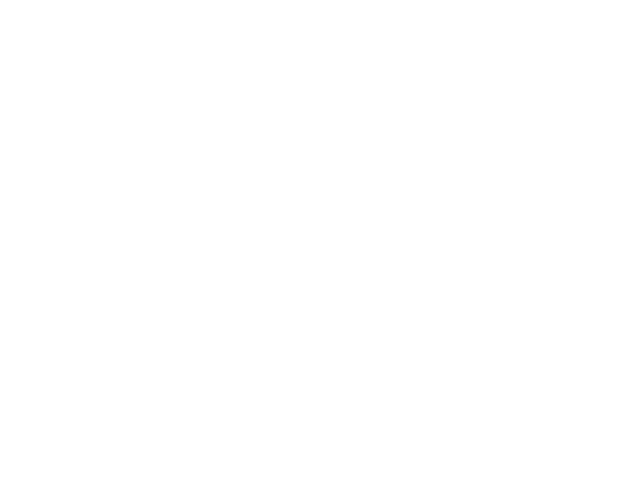

In [5]:
plt.plot(3,2)
plt.plot(3,2,'*')

### matplotlib notebook vs matplotlib inline
matplotlib notebook
1. Interactive

matplotlib inline
1. Not interactive. So create new plotas as new cells.

In the last lecture, I explained that there's an Artist layer, and that it is figures with subplots and axes and data points, which are rendered as patches onto these axes, but we haven't seen any of that here. Instead, we just called one function on a module named plot, so what's going on? **The pyplot scripting interface is managing a lot of objects for you. It keeps track of the latest figure of subplots, and of the axis objects. Moreover, it actually hides some of these behind methods of its own. So the pyplot module itself has a function which is called plot, but it redirects calls to this function to the current axes object.** This makes for a significant learning curve, and you'll see many discussions in web tutorials, and Stack Overflow, where people are confused by these two different approaches to making figures show up.

In [6]:
plt.plot(4,5,'.')

In [7]:
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

fig = Figure()
canvas = FigureCanvasAgg(fig)

ax = fig.add_subplot(111)
ax.plot(3,2,'.')
canvas.print_png('test.png')

In [8]:
%%html
<img src='test.png'/>

<IPython.core.display.Javascript object>


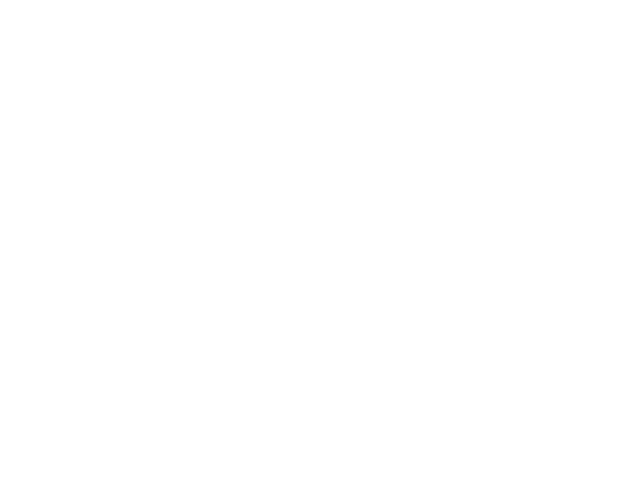

[0, 10, 0, 10]

In [9]:
plt.figure() #new figure
plt.plot(3,2,'o')
plt.plot([1,2,3],[4,5,6],'*') #Each plot has different color and can plot multi-points.
ax = plt.gca()
ax.axis([0,10,0,10])

But we can go further with the axes object to the point where we can actually get all of the child objects that that axes contains. We do this with the axes get_children function. Here, we can see that there's actually three line to the objects contained in this axes, these are our data points. A number of spines which are actual renderings of the borders of the frame including tic markers, two axis objects, and a bunch of text which are the labels for the chart. There's even a rectangle which is the background for the axes. Okay, so there's a whirlwind tour of how to be productive with matplotlib and make your first chart.

In [10]:
ax.get_children()

### Scatter plots

<IPython.core.display.Javascript object>


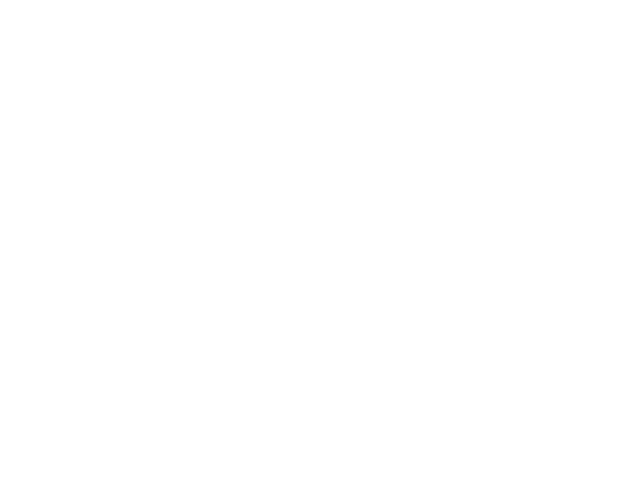

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(np.arange(1,10))
y = x

plt.figure()
plt.scatter(x,y)

<IPython.core.display.Javascript object>


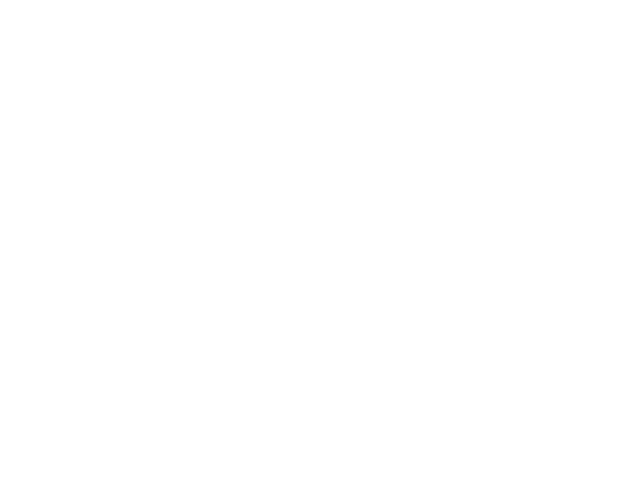

In [12]:
colors = ['green']*(len(x)-1)+['red']
plt.figure()
plt.scatter(x,y,c=colors)

**Lazy evaluation**

It's a kind of characteristic of Python. It saves the parameters as object and return the result when user requests.

In [13]:
#zip
zip_gen = zip([1,2,3,4,5],[2,3,4,5,6])
zip_gen

In [14]:
list(zip_gen)

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

In [15]:
list(zip_gen) #zip object를 list로 바꾸면 기존 zip object가 사라짐(?)

[]

In [16]:
zip_gen = zip([1,2,3,4,5],[4,5,6,7,8])
x,y = zip(*zip_gen)
x,y

((1, 2, 3, 4, 5), (4, 5, 6, 7, 8))

<IPython.core.display.Javascript object>


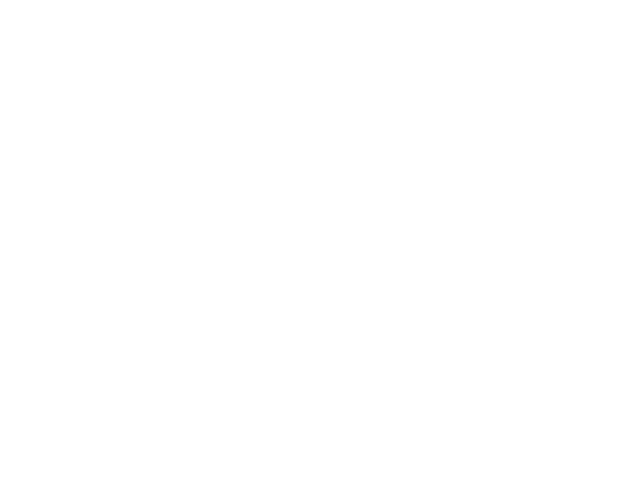

In [17]:
plt.figure()
plt.scatter(x[:2],y[:2],c='r',label='Tall')
plt.scatter(x[2:],y[2:],c='b',label='Mall')

let's talk a bit more about the properties of axis.
The axis generally have labels to them to explain what they represent or the units that they describe.
Charts tend to have titles as well, so let's put this in place now.
Since pyplot mirrors much of the axis API, we can make calls directly on pyplot.

In [18]:
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

The legend itself is an artist, which means it can contain children. Let's take advantage of this and write a little routine to recursively go through the list of children in an artist.

In [19]:
legend = plt.gca().get_children()[-2]

In [20]:
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [21]:
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    from matplotlib.artist import Artist
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall')
                        Text(0,0,'Mall')
    FancyBboxPatch(0,0;1x1)


What I want you to take away from this is that there is nothing magical about what matplotlib is doing. Calls to the scripting interface, just create figures, subplots, and axis. Then load those axis up with various artists, which the back-end renders to the screen or some other medium like a file.

While you'll spend 95% of your time at the scripting layer, happily creating graphs and charts, it's important to understand how the library works underneath for the other 5% of the time.

### Line plots

In [22]:
%matplotlib notebook

<IPython.core.display.Javascript object>


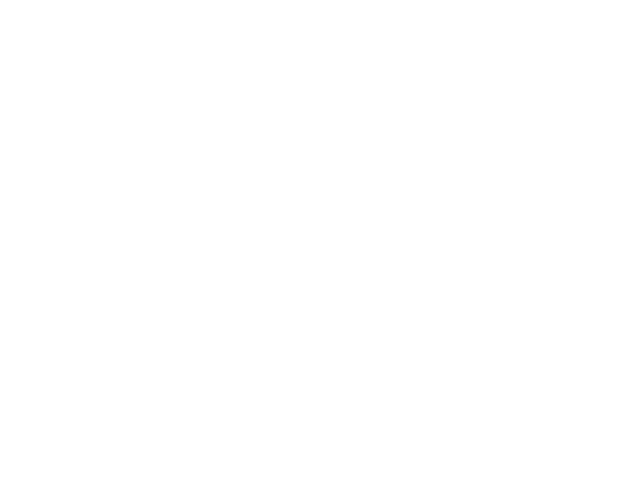

In [23]:
import numpy as np
import matplotlib.pyplot as plt

linear = np.arange(0,100)
quad = linear**2

plt.figure()
plt.plot(linear,'-o',quad,'-*')

Like all good Python libraries matplotlib invents a string based mini language for commonly used formatting. For instance, we could use an s inside of the formatting string which would plot another point using a square marker.

In [24]:
plt.plot([11,22,55,44],'--r')

plt.xlabel('index')
plt.ylabel('value')
plt.legend(['A','B'])

#### fill_between func

In [25]:
plt.gca().fill_between(range(len(linear)),
                      linear, quad,
                      facecolor='blue',
                      alpha=0.25)

<IPython.core.display.Javascript object>


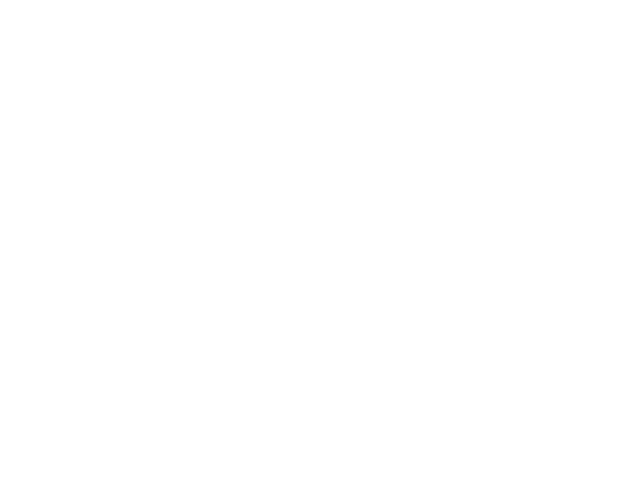

In [26]:
# We can use date time as x-axis
plt.figure()
x = np.arange(0,10)
date = np.arange('2017-01-01','2017-01-31',3,dtype='datetime64[D]')
plt.plot(date,x,'-o')
#But, result is not satisfactory

This is unfortunately one of the great pain points in data science in Python, date time handling. The standard library does it in two different ways, while NumPy, which is used for scientific computing, does it a third way. In fact, there's probably a dozen replacement libraries for date times in Python.

The solution I'm going to use here comes from a helper library in Pandas called to datetime. This specifically converts NumPy dates into standard library dates which is what matplotlib is expecting.

<IPython.core.display.Javascript object>


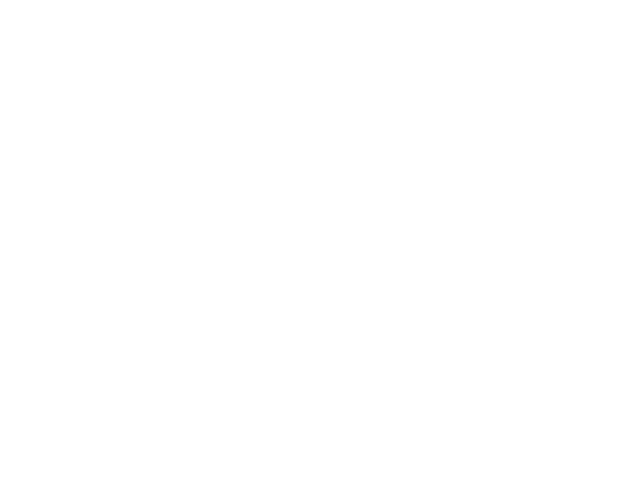

In [27]:
plt.figure()
import pandas as pd
date = np.arange('2017-01-01','2017-01-31',3,dtype='datetime64[D]')
date = pd.to_datetime(date)
plt.plot(date,x,'-o')

In [28]:
def rec_gc(art, depth=0):
    from matplotlib.artist import Artist
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)
            
rec_gc(plt.gca().xaxis)

XAxis(80.000000,52.800000)
    Text(0.5,0,'')
    Text(1,0,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
        Line2D()
        Line2D()
        Line2D((0,0),(0,1))
        Text(0,0,'')
        Text(0,1,'')
 

Just like all artists, an axes has a bunch of children which are themselves artists. In fact, if you're are following along in the Jupiter notebook with this lecture why don't you just pause the video. And run the wreck_gc function we wrote earlier to explore what kind of artists the x axes object actually contains.

Each of the tick labels are a text object which itself is an artist. This means that you can use a number of different artist functions.

=> figure의 하위집합의 axis에 접근해서 직접 바꿀 수 있다고

In [29]:
xaxis = plt.gca().xaxis
for item in xaxis.get_ticklabels():
    item.set_rotation(45)
    
plt.subplots_adjust(bottom=0.25)

Matplotlib has a fairly strong connection to LaTeX a type setting language used by mathematicians and scientists. This means that you can use a subset of LaTeX directly in your labels then matplotlib will render them as equations Here, for instance, we can set the title of the axes so that there's an x squared directly in it. We do this by escaping to LaTeX math mode with dollar signs.

In [30]:
ax = plt.gca()
ax.set_title('($x^2$) vs ($x$)')

### Bar Charts

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>


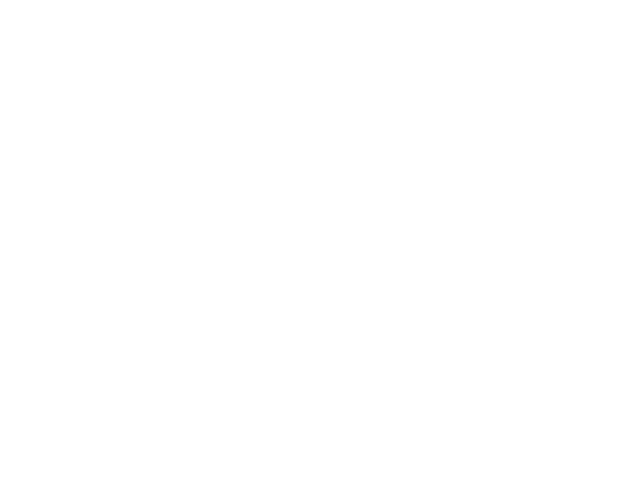

<Container object of 5 artists>

In [32]:
plt.figure()
xvals = np.arange(0,5)
yvals = np.random.randint(0,20,5)
plt.bar(xvals,yvals,width=0.3)

In [33]:
#Add new bar next to initial bar
#But location of xaxis label is not satisfying
quad_xvals = xvals+0.3
quad_yvals = yvals**2
plt.bar(quad_xvals,quad_yvals,width=0.3,color='r') #

<Container object of 5 artists>

In [34]:
#Add X error or Y error
err = [np.random.randint(0,15) for x in range(len(xvals))]
plt.bar(xvals,yvals,width=0.3,yerr=err)
err_x = [np.random.randint(0,5) for x in range(len(xvals))]
plt.bar(xvals,yvals,width=0.3,xerr=err_x)

<Container object of 5 artists>

<IPython.core.display.Javascript object>


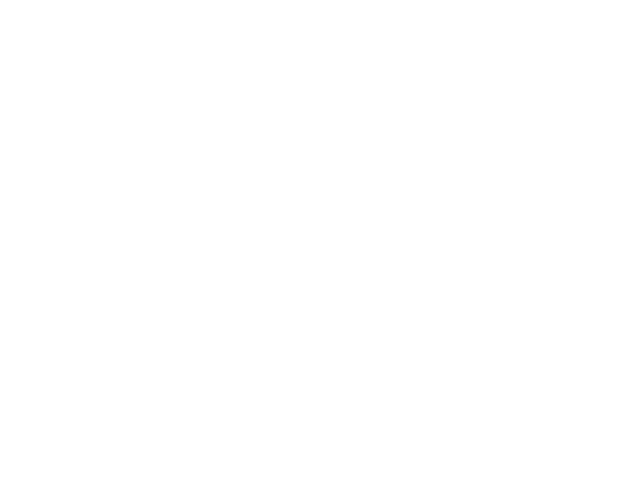

<Container object of 5 artists>

In [35]:
#Stack two bars
plt.figure()
plt.bar(xvals,yvals,color='b')
plt.bar(xvals,quad_yvals,color='y',bottom=yvals)

<IPython.core.display.Javascript object>


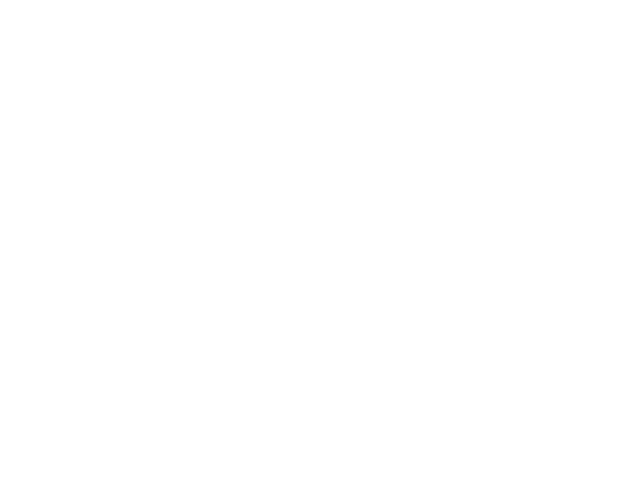

<Container object of 5 artists>

In [36]:
#Transpose bar charts -> Horizontal

plt.figure()
plt.barh(xvals,yvals,height=0.3,color='b')
plt.barh(xvals,quad_yvals,height=0.3,color='black',left=yvals)
#진짜 걍 노가다구나

### Dejunkifying a Plot - video

In [37]:
%matplotlib notebook

<IPython.core.display.Javascript object>


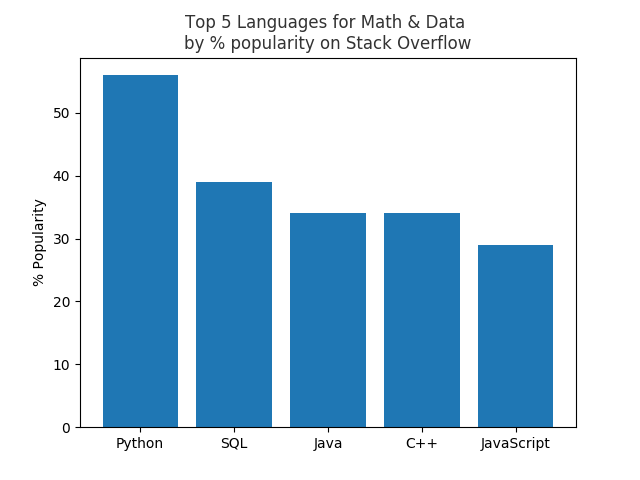

In [38]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')

plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

<IPython.core.display.Javascript object>


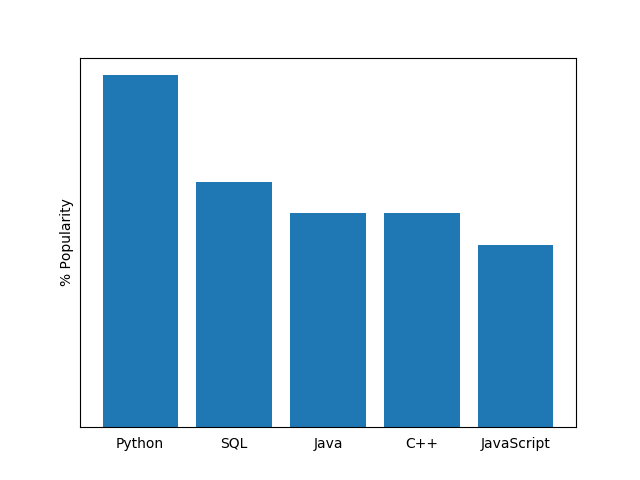

In [39]:
plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
#new : tick_params
plt.tick_params(left='off',top='off',right='off',bottom='off',labelleft='off',labelbottom='on')

<IPython.core.display.Javascript object>


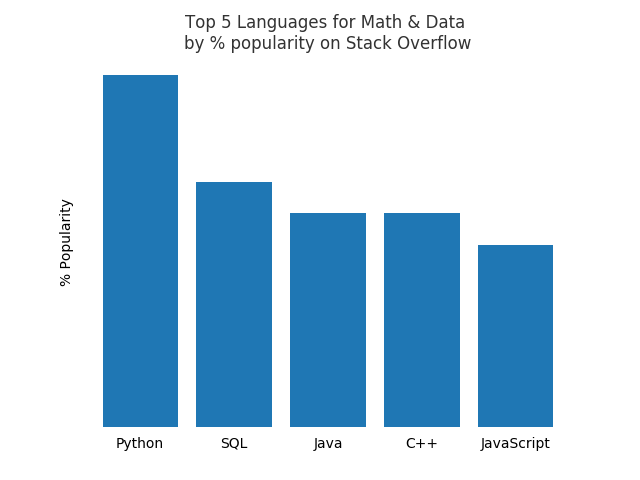

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# TODO: remove the frame of the chart
#Answer 1
plt.box(False)
#Answer 2(professor suggested)
#for spine in plt.gca().spines.values():
#    spine.set_visible(False)

plt.show()

<IPython.core.display.Javascript object>


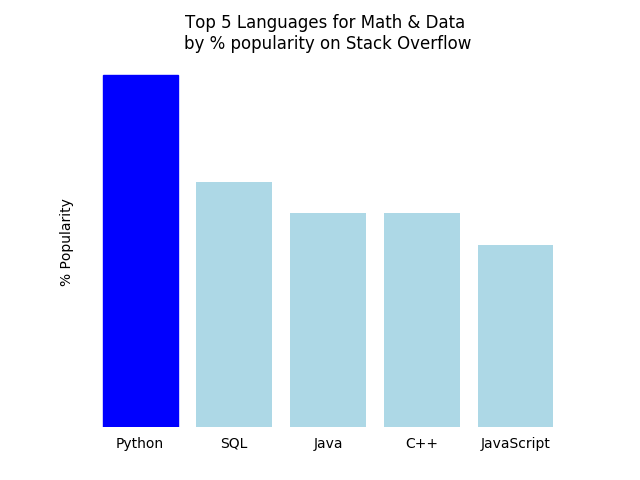

In [41]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]
# TODO: change the bar colors to be less bright blue
# TODO: make one bar, the python bar, a contrasting color
bars = plt.bar(pos, popularity, align='center',color='#add8e6')
bars[0].set_color('blue')
# TODO: soften all labels by turning grey
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow')
mpl.rcParams.update({'text.color' : "grey",
                     'axes.labelcolor' : "grey",
                    'xtick.color':'grey'})

# change the bar colors to be less bright blue
#bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
#bars[0].set_color('#1F77B4')

# soften all labels by turning grey
#plt.xticks(pos, languages, alpha=0.8)
#plt.ylabel('% Popularity', alpha=0.8)
#plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off',
                labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()
#mpl.rcParams.keys()

<IPython.core.display.Javascript object>


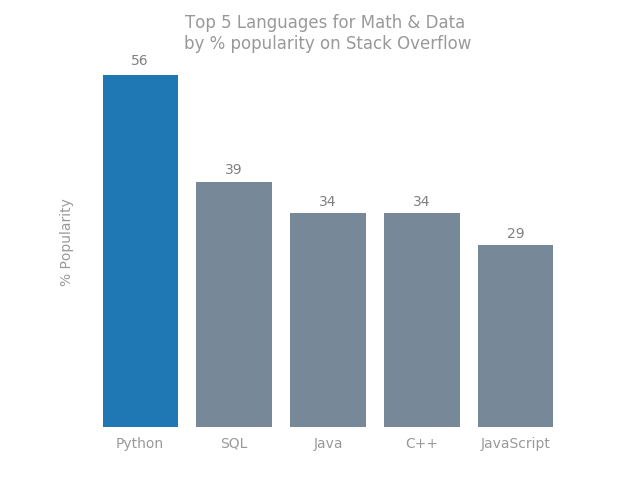

In [42]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'SQL', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [56, 39, 34, 34, 29]

# change the bar colors to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# make one bar, the python bar, a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)

# TODO: remove the Y label since bars are directly labeled
plt.ylabel('% Popularity', alpha=0.8)
plt.title('Top 5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# TODO: direct label each bar with Y axis values
# 진짜 쓉 노가다구나
ax = plt.gca()
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')
autolabel(bars)

plt.show()
#'%d' % int(height)

#### My report
ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

When I change value of height to very large number, population texts are removed.

ax.text(rect.get_x() + rect.get_width()/2., 33*height,
                '%d' % int(height),
                ha='center', va='bottom')

In the previous reading material, matplotlib removes elements outof plots


In [43]:
'%d' % 5

'5'